# Contextualização

O conjunto de dados consiste em informações de 120 pacientes de psicologia, com foco em 17 sintomas essenciais para diagnosticar distúrbios de bipolaridade, transtorno depressivo maior e indivíduos normais. 


- Patient Number: Número de identificação único para cada paciente.
- Sadness: Indica a presença ou ausência de sintomas de tristeza no paciente.
- Euphoric: Indica a presença ou ausência de sintomas de euforia no paciente.
- Exhausted: Indica a presença ou ausência de sintomas de exaustão no paciente.
- Sleep Disorder: Indica a presença ou ausência de distúrbios do sono no paciente.
- Mood Swing: Indica a presença ou ausência de oscilações de humor no paciente.
- Suicidal Thoughts: Indica a presença ou ausência de pensamentos suicidas no paciente.
- Anorexia: Indica a presença ou ausência de sintomas de anorexia no paciente.
- Authority Respect: Indica a atitude do paciente em relação à autoridade.
- Try-Explanation: Indica a disposição do paciente em tentar explicar as situações.
- Aggressive Response: Indica a resposta agressiva do paciente.
- Ignore & Move-On: Indica se o paciente tende a ignorar e seguir em frente.
- Nervous Break-down: Indica a presença ou ausência de colapsos nervosos no paciente.
- Admit Mistakes: Indica se o paciente está disposto a admitir seus erros.
- Overthinking: Indica se o paciente tem o hábito de pensar excessivamente.
- Sexual Activity: Indica a atividade sexual do paciente.
- Concentration: Indica a capacidade de concentração do paciente.
- Optimism: Indica o nível de otimismo do paciente.
- Expert Diagnose: Indica a classificação do diagnóstico do paciente (Bipolar Type-1, Bipolar Type-2, Depressão, Normal).

# Analise exploratoria de dados(EDA)

Importações

In [1]:
# Tratamento de dados
import pandas as pd
import numpy as np 

# Bibliotecas para EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

# Não exisbir warnings
import warnings
warnings.filterwarnings("ignore")

# Fazendo o ggplot ser o estilo padrao de todos os plots
plt.style.use('ggplot') 

# Configurar para exibir ate 15 linhas de um DF em pandas e para mostrar todas as colunas
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)

In [2]:
disorders = pd.read_csv('DataSet/Dataset-Mental-Disorders.csv')
disorders.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [3]:
disorders.describe()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Patiant-01,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,1,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


In [4]:
disorders.shape

(120, 19)

In [5]:
disorders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [6]:
disorders.nunique().sort_values(ascending=False)

Patient Number        120
Optimisim               9
Sexual Activity         9
Concentration           8
Sadness                 4
                     ... 
Ignore & Move-On        2
Nervous Break-down      2
Admit Mistakes          2
Overthinking            2
Try-Explanation         2
Length: 19, dtype: int64

Mudando as colunas que tem "X de 10" para ficar apenas com o numero

In [7]:
columns = ['Sexual Activity', 'Concentration', 'Optimisim']
for col in columns:
    disorders[col] = disorders[col].str.split(' ').str[0]
    disorders[col] = disorders[col].astype('int16')
disorders.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3,3,4,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4,2,5,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6,5,7,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3,2,2,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5,5,6,Normal


In [8]:
disorders['Suicidal thoughts'].unique()

array(['YES ', 'YES', 'NO'], dtype=object)

Mudando as dummies de NO e YES para 1 e 0

In [9]:
columns = ['Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking']
for col in columns:
    disorders[col] = disorders[col].str.strip().map({
        "NO": 0,
        "YES": 1
    })
disorders.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal


## Analise Univariadas

Primeiramente vamos fazer a contagem das variaveis categoricas

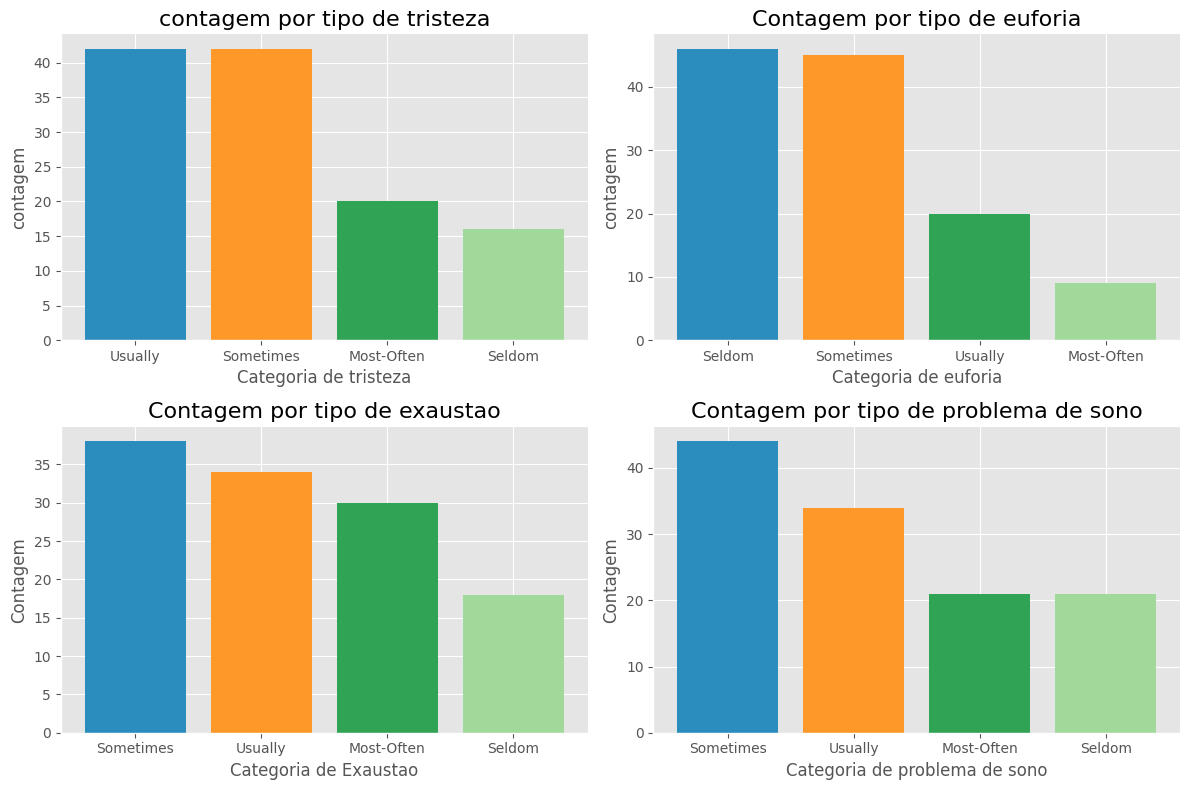

In [10]:
# Para calcular as medias de cobranças para categorias das variaveis, usaremos groupby
charges_per_sadness = disorders['Sadness'].value_counts().sort_values(ascending=False)
charges_per_euphoric = disorders['Euphoric'].value_counts().sort_values(ascending=False)
charges_per_exhausted = disorders['Exhausted'].value_counts().sort_values(ascending=False)
charges_per_sleep = disorders['Sleep dissorder'].value_counts().sort_values(ascending=False)

colors = ['#2b8cbe', '#fe9929', '#31a354', '#a1d99b']

fig, axes = plt.subplots(2,2, figsize=(12, 8))

# FUnção para plotar o barplot pra evitar repetição de codigo
def barplot(linha, coluna, x_value, y_value, x_description, y_description, title):
    axes[linha,coluna].bar(x_value, y_value, color=colors)
    axes[linha,coluna].set_title(title, fontsize=16)
    axes[linha,coluna].set_xlabel(x_description, fontsize=12)
    axes[linha,coluna].set_ylabel(y_description, fontsize=12)
    axes[linha,coluna].spines['top'].set_visible(False)
    axes[linha,coluna].spines['right'].set_visible(False)   


barplot(0,0, charges_per_sadness.index, charges_per_sadness.values, 'Categoria de tristeza', 'contagem', 'contagem por tipo de tristeza')
barplot(0,1, charges_per_euphoric.index, charges_per_euphoric.values, 'Categoria de euforia', 'contagem', 'Contagem por tipo de euforia')
barplot(1,0, charges_per_exhausted.index, charges_per_exhausted.values, 'Categoria de Exaustao', 'Contagem', 'Contagem por tipo de exaustao')
barplot(1,1, charges_per_sleep.index, charges_per_sleep.values, 'Categoria de problema de sono', 'Contagem', 'Contagem por tipo de problema de sono')

plt.tight_layout()
plt.show()

Se tratando dos problemas de exaustao, problemas de sono e tristeza, podemos perceber que a maioria dos registros apresentam uma frequencia regular nesses problemas. No caso da euforia, a maioria das pessoas apresenta raramente essa condição

Analisando as variáveis numericas

In [11]:
fig = go.Figure()
def boxplot(data, name, color):
    fig.add_trace(go.Box(y=data,
                            name=name,
                            boxpoints="outliers",
                            marker_color=color))

boxplot(disorders["Sexual Activity"], "Atividade Sexual", 'lightblue')
boxplot(disorders["Concentration"], "Foco", 'thistle')
boxplot(disorders["Optimisim"], "Otimismo", 'lightgreen')

fig.update_layout(
    xaxis=dict(title="Classe"),
    yaxis=dict(title="Valor"),
    title="Nivel de frequencia de cada classe numa escala de 0 a 10",
    showlegend=True
)

fig.show()

Percebemos que a maioria dos registros tendem a ter um foco e um otimisco relativamente baixos, apesar do otimismo ter alguns outliers pra cima. Enquanto em atividade sexual temos um valor um pouco maior que os outros, apesar de alguns outliers pra baixo

Analisando as variaveis dummies 

In [12]:
from tabulate import tabulate

columns = ['Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking']

desc = disorders[columns].describe()
desc = pd.DataFrame(desc)
print(tabulate(desc, headers="keys", tablefmt="psql", showindex=True))

+-------+--------------+---------------------+------------+---------------------+-------------------+-----------------------+--------------------+----------------------+------------------+----------------+
|       |   Mood Swing |   Suicidal thoughts |    Anorxia |   Authority Respect |   Try-Explanation |   Aggressive Response |   Ignore & Move-On |   Nervous Break-down |   Admit Mistakes |   Overthinking |
|-------+--------------+---------------------+------------+---------------------+-------------------+-----------------------+--------------------+----------------------+------------------+----------------|
| count |   120        |          120        | 120        |          120        |        120        |            120        |         120        |           120        |       120        |     120        |
| mean  |     0.475    |            0.475    |   0.383333 |            0.391667 |          0.475    |              0.483333 |           0.416667 |             0.516667 |       

A maioria das variaveis tem uma maior quenatidade de não do que sim, por excessão de Overthinking e Colapso nervoso

Por fim, vamos olhar para o nosso target

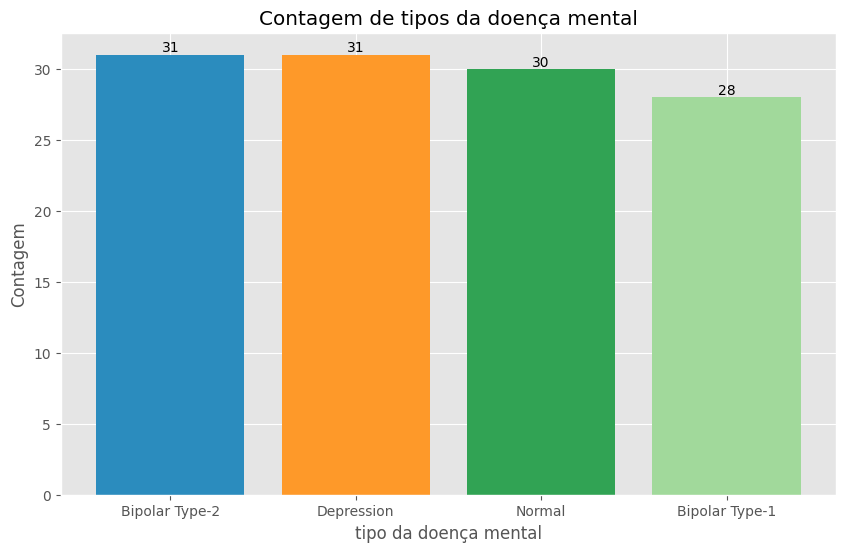

In [13]:
type_count = disorders['Expert Diagnose'].value_counts()
colors = ['#2b8cbe', '#fe9929', '#31a354', '#a1d99b']

# Plotando o grafico
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(type_count.index, type_count.values, color=colors)
ax.set_xlabel('tipo da doença mental')
ax.set_ylabel('Contagem')
ax.set_title('Contagem de tipos da doença mental')

# Adiconando o texto: Numero escrito da quantidade pro regiao
for index, value in enumerate(type_count.values):
    # Vamos colocar na posição (index, valor) uma vez que ele vai ter que ficar horizontalmente na sua categoria, e na altura do valor, uma vez que a altura da barra é o proprio valor
    ax.text(index, value, str(value), ha='center', va='bottom')

plt.show()

Temos bastante simetrica para a contagem dos tipos de doenças psicologicas

## Analise Multivariadas

In [14]:
disorders.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal


### Como a tristeza afeta as pessoas?
- Como o nivel de tristeza se comporta em relação ao de ocilações de humor?
- As pessoas que apresentam tristeza com mais frequencia tendem a ter Overthinking? Sera que ficam menos otimistas? 
- Como o Grau de tristeza tende a afetar a capacidade do paciente de seguir em frente?

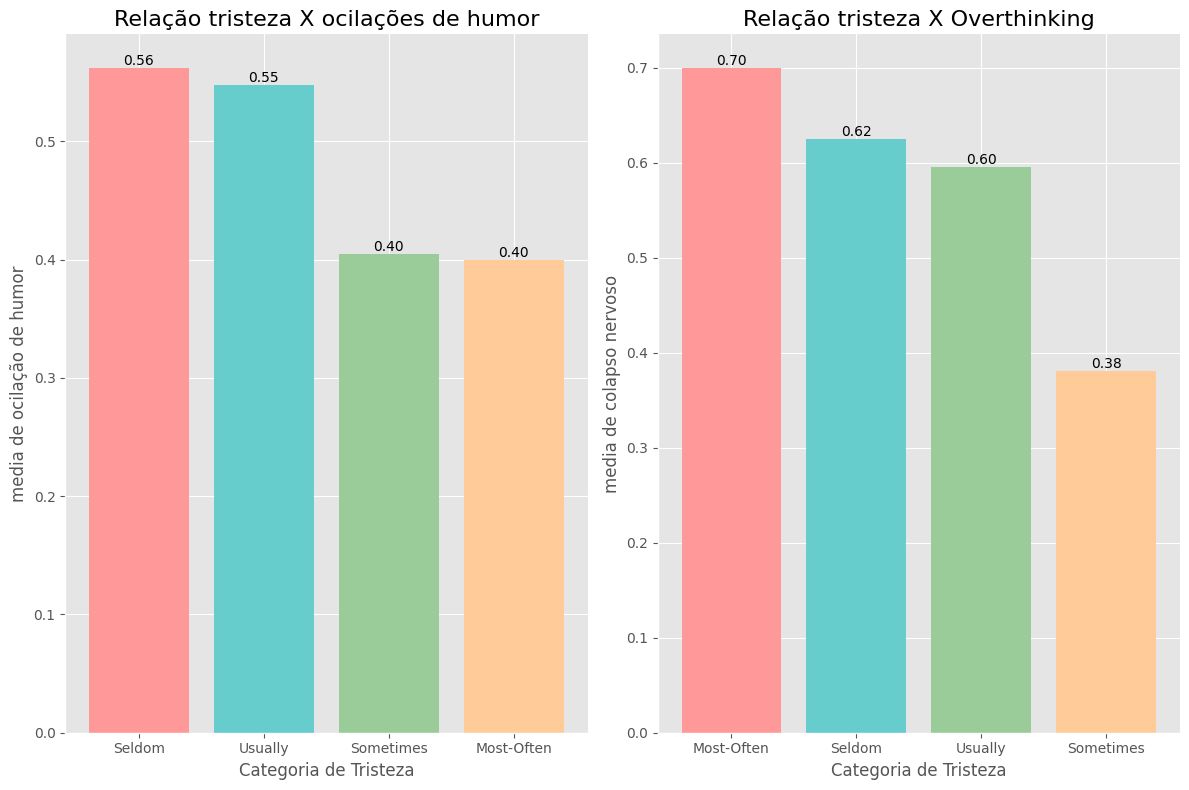

In [15]:
mood_per_sad = disorders.groupby('Sadness')['Mood Swing'].mean().sort_values(ascending=False)
over_per_sad = disorders.groupby('Sadness')['Overthinking'].mean().sort_values(ascending=False)

colors = ['#FF9999', '#66CCCC', '#99CC99', '#FFCC99']


fig, axes = plt.subplots(1,2, figsize=(12, 8))

# FUnção para plotar o barplot pra evitar repetição de codigo
def barplot(ax, x_value, y_value, x_description, y_description, title):
    ax.bar(x_value, y_value, color=colors)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_description, fontsize=12)
    ax.set_ylabel(y_description, fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False) 

    for index, value in zip(x_value, y_value):
        ax.text(index, value, str(f'{value:.2f}'), ha='center', va='bottom')  


barplot(axes[0], mood_per_sad.index, mood_per_sad.values, 'Categoria de Tristeza', 'media de ocilação de humor', 'Relação tristeza X ocilações de humor')
barplot(axes[1], over_per_sad.index, over_per_sad.values, 'Categoria de Tristeza', 'media de colapso nervoso', 'Relação tristeza X Overthinking')

plt.tight_layout()
plt.show()

- As pessoas que apresentam maior grau de tristeza tendem a ter um grau maior de overthinking, indicando um possivel fator que poderia ser trabalhado com pisicologos

### Como a **exaustão** afeta as pessoas? 
- sera que o foco tem uma queda significativa? 
- sera que afeta o humor, mudando a agressividade e nervosismo?

In [16]:
fig = go.Figure()
def boxplot(data, name, color):
    fig.add_trace(go.Box(y=data,
                            name=name,
                            boxpoints="outliers",
                            marker_color=color))

boxplot(disorders[disorders['Exhausted'] == 'Seldom']["Concentration"], "raramente", 'lightblue')
boxplot(disorders[disorders['Exhausted'] == 'Sometimes']["Concentration"], "As vezes", 'thistle')
boxplot(disorders[disorders['Exhausted'] == 'Usually']["Concentration"], "Geralmente", 'lightgreen')
boxplot(disorders[disorders['Exhausted'] == 'Most-Often']["Concentration"], "frequente", 'tomato')

fig.update_layout(
    xaxis=dict(title="Nivel de Exaustão"),
    yaxis=dict(title="Nivel de foco"),
    title="Como o nivel de exaustão afeta o de foco?",
    showlegend=True
)

fig.show()

- As pessoas que apresentam um nivel mais elevado de fadiga tendem a ter um foco **levemente maior**, talvez por focar mais, elas acabem se Cansando mais no processo, mas não é possivel inferir uma grande relação entre elas. Indicando assim que **possivelmente a exaustão é uma consequencia do foco**, e não o contrário, como a hipotese dizia.

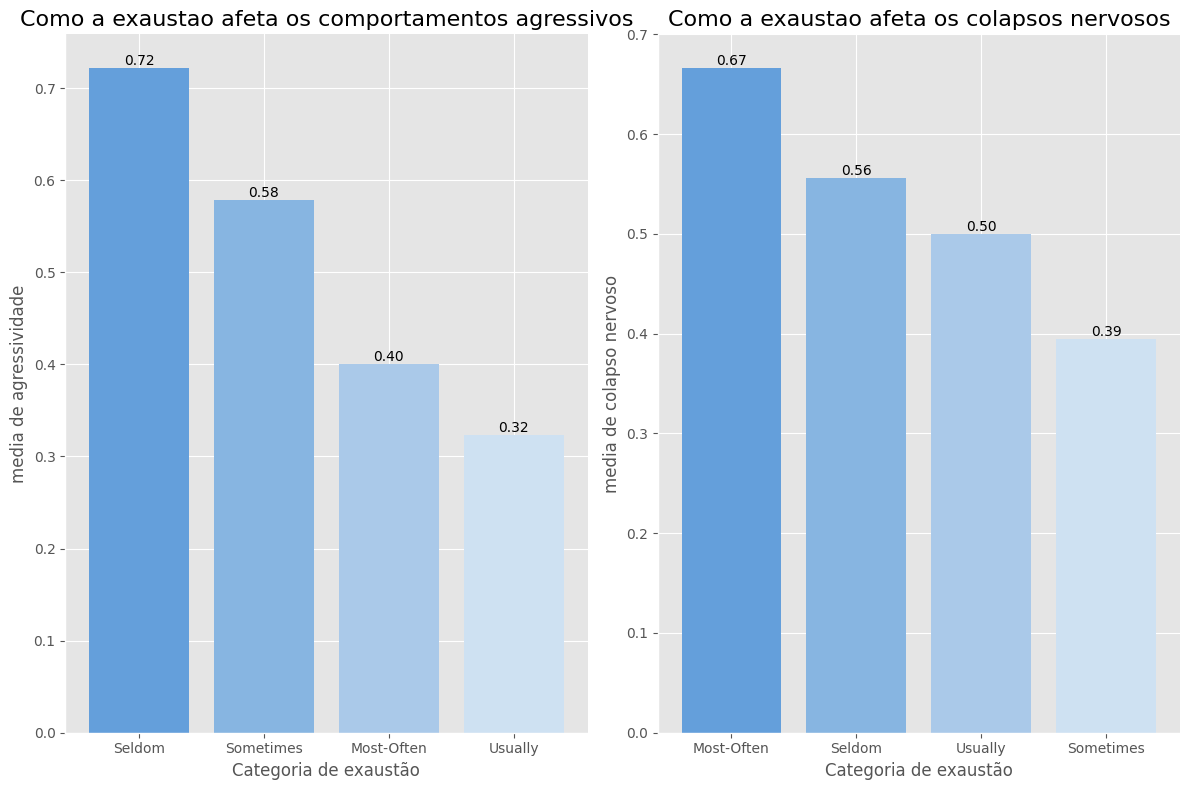

In [17]:
agressive_per_exhaust = disorders.groupby('Exhausted')['Aggressive Response'].mean().sort_values(ascending=False)
nervous_per_exhaust = disorders.groupby('Exhausted')['Nervous Break-down'].mean().sort_values(ascending=False)

colors = ['#649FDB', '#87B5E1','#AAC9E9','#CEE1F2']

fig, axes = plt.subplots(1,2, figsize=(12, 8))

# FUnção para plotar o barplot pra evitar repetição de codigo
def barplot(ax, x_value, y_value, x_description, y_description, title):
    ax.bar(x_value, y_value, color=colors)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_description, fontsize=12)
    ax.set_ylabel(y_description, fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False) 

    for index, value in zip(x_value, y_value):
        ax.text(index, value, str(f'{value:.2f}'), ha='center', va='bottom')  


barplot(axes[0], agressive_per_exhaust.index, agressive_per_exhaust.values, 'Categoria de exaustão', 'media de agressividade', 'Como a exaustao afeta os comportamentos agressivos')
barplot(axes[1], nervous_per_exhaust.index, nervous_per_exhaust.values, 'Categoria de exaustão', 'media de colapso nervoso', 'Como a exaustao afeta os colapsos nervosos')

plt.tight_layout()
plt.show()

- No primeiro grafico, podemos identificar que **os grupos que mais apresentam casos de comportamentos agressivos são aqueles que menos se sentem cansado**. Talvez os casos de comportamentos agressivos sejam mais altos quando as pessoas **apresentam um maior nivel de energia e não conseguem controlar com maestria as emoções** e acabam apresentando traços de personalisade agressivos? Vale a pena um estudo mais profundo sobre como a energia afeta a agressividade, em caso positivo, também valeria a pena estudar como o uso de calmantes pode afetar essa situação!
- No segundo gráfico não foi possivel inferir uma clara relação entre colapsos nervosos e exaustão, mostrando que, pelo menos em primeira analise, essas duas caracteristicas tendem a não conversar tanto entre si

# Modelagem

In [18]:
disorders.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal


In [19]:
disorders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    int64 
 6   Suicidal thoughts    120 non-null    int64 
 7   Anorxia              120 non-null    int64 
 8   Authority Respect    120 non-null    int64 
 9   Try-Explanation      120 non-null    int64 
 10  Aggressive Response  120 non-null    int64 
 11  Ignore & Move-On     120 non-null    int64 
 12  Nervous Break-down   120 non-null    int64 
 13  Admit Mistakes       120 non-null    int64 
 14  Overthinking         120 non-null    int64 
 15  Sexual Activity      120 non-null    int16 
 16  Concentr

In [60]:
# Importando bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from category_encoders import TargetEncoder, CatBoostEncoder, WOEEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

Devidindo em treino e teste

In [21]:
X = disorders.drop(['Expert Diagnose', 'Patient Number'], axis=1)
y = disorders['Expert Diagnose']

In [22]:
X.columns

Index(['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim'],
      dtype='object')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

In [41]:
categorical_features

['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder']

In [25]:
numeric_features

['Mood Swing',
 'Suicidal thoughts',
 'Anorxia',
 'Authority Respect',
 'Try-Explanation',
 'Aggressive Response',
 'Ignore & Move-On',
 'Nervous Break-down',
 'Admit Mistakes',
 'Overthinking',
 'Sexual Activity',
 'Concentration',
 'Optimisim']

In [63]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()),
    ])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder())
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)                                      

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Mood Swing',
                                                   'Suicidal thoughts',
                                                   'Anorxia',
                                                   'Authority Respect',
                                                   'Try-Explanation',
                                                   'Aggressive Response',
                                                   'Ignore & Move-On',
                                                   'Nervous Break-down',
                                                   'Admit Mistakes',
                                                   'Overthinking',
                                                   'Sexual Activity',
                                                   'Concentration',
                                                   'Optimisim']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Sadness', 'Euphoric',
                                                   'Exhausted',
                                                   'Sleep dissorder'])])),
                ('classifier', LogisticRegression())])

In [64]:
y_pred = pipeline.predict(X_test)
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1: {f1_score(y_test, y_pred, average='weighted')}")
print(f"Acc: {accuracy_score(y_test, y_pred)}")

Precision: 0.9090909090909092
Recall: 0.875
F1: 0.8678229665071769
Acc: 0.875


Exportando o modelo para usar na API

In [66]:
import joblib
joblib.dump(pipeline, 'MentalDisorders.pkl')

['MentalDisorders.pkl']